In [1]:
import TB_Library.TB_Data as tb_dt
import TB_Library.TB_Draw as tb_dw
import TB_Library.TB_Signal as tb_sg

import matplotlib.pyplot as plt
import numpy as np

In [2]:
trainDataRootPath = './train_data/'
validDataRootPath = './valid_data/'

In [15]:
train_s = 20

trainDataPath = tb_dt.GetPathAndClassDfFromRoot(trainDataRootPath)
df = tb_dt.ReadTableTennisDataToDatameta(trainDataPath.loc[train_s, 'path'])
numOfWave = 10

axis9 = df.loc[df.index, 'ax':'rz'].to_numpy().reshape(-1, 9)
axisA = df.loc[df.index, 'ax':'az'].to_numpy().reshape(-1, 3)
axisG = df.loc[df.index, 'gx':'gz'].to_numpy().reshape(-1, 3)
axisR = df.loc[df.index, 'rx':'rz'].to_numpy().reshape(-1, 3)

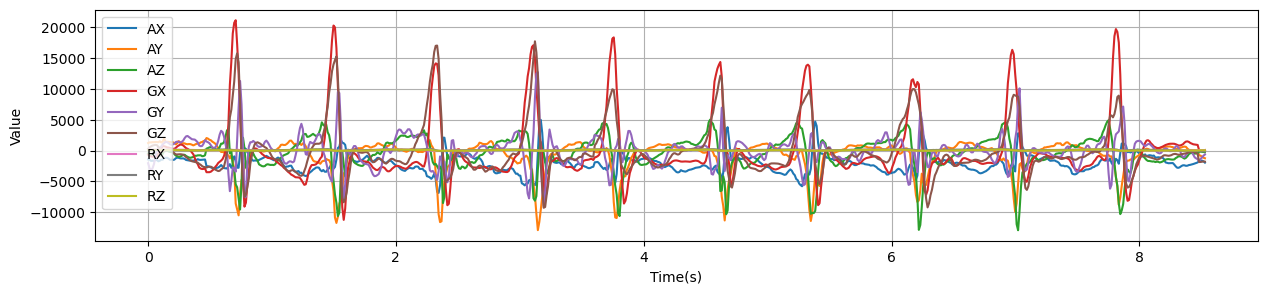

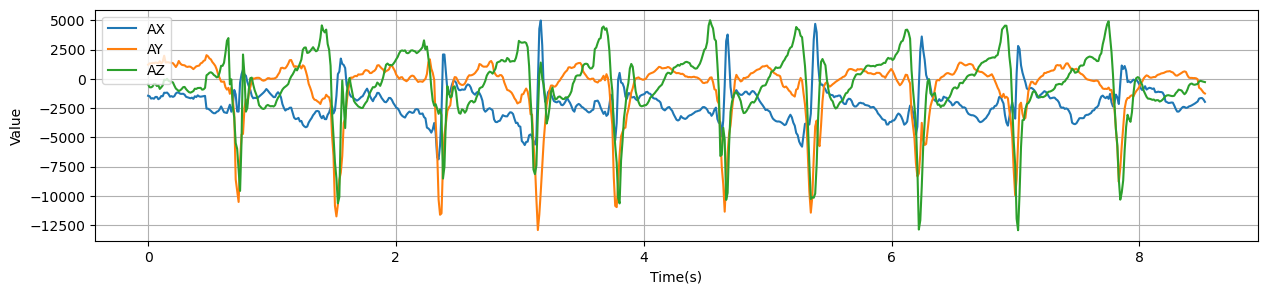

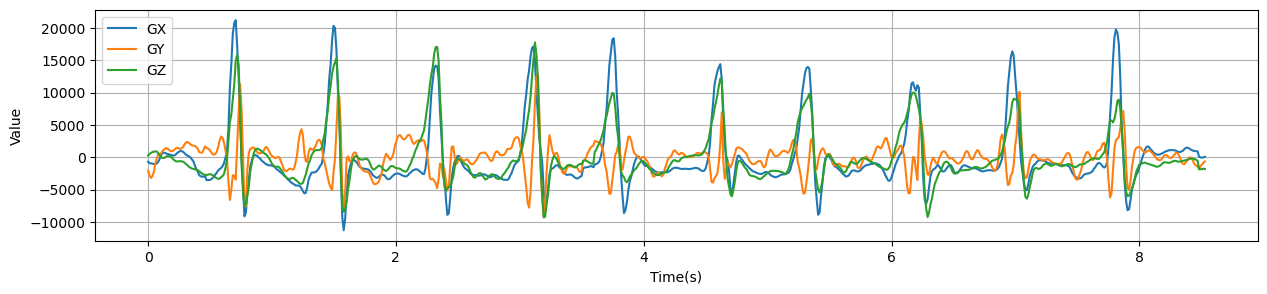

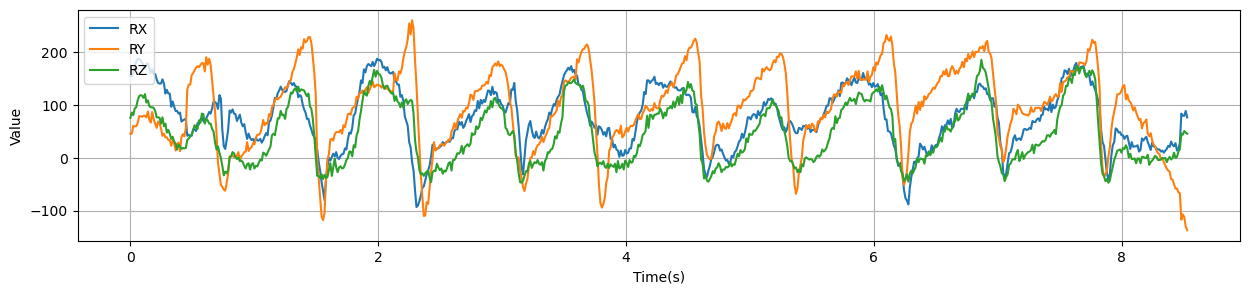

In [16]:
tb_dw.FigNew()
tb_dw.FigAddAxis(axis9, pf='ALL', showAfterAdd=False)
tb_dw.FigNew()
tb_dw.FigAddAxis(axis9, pf='A', showAfterAdd=True)
tb_dw.FigNew()
tb_dw.FigAddAxis(axis9, pf='G', showAfterAdd=True)
tb_dw.FigNew()
tb_dw.FigAddAxis(axis9, pf='R', showAfterAdd=True)


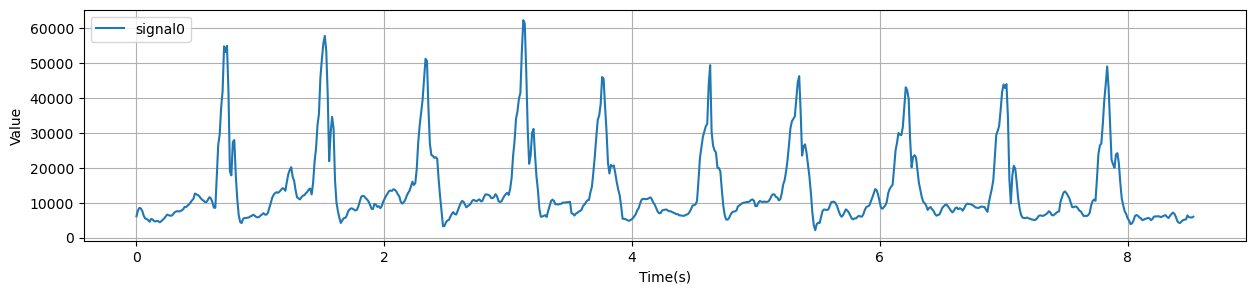

In [17]:
f_a = axisA
f_g = axisG

axisAbsSum_A = np.zeros([len(axisA), 1])
axisAbsSum_G = np.zeros([len(axisG), 1])

for i in range(len(axis9)):
    axisAbsSum_A[i] = (abs(axisA[i][0]) + abs(axisA[i][1]) + abs(axisA[i][2]))
    axisAbsSum_G[i] = (abs(axisG[i][0]) + abs(axisG[i][1]) + abs(axisG[i][2]))


fags = axisAbsSum_A + axisAbsSum_G
tb_dw.FigNew()
tb_dw.FigAddSignal(fags)
plt.show()


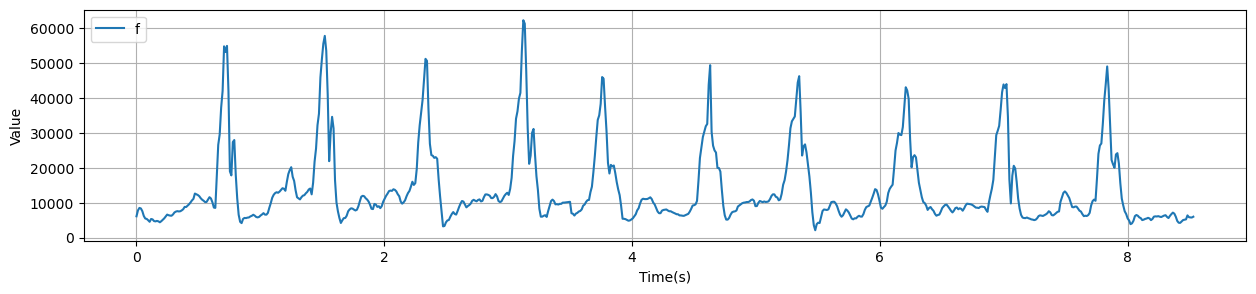

In [18]:
f = fags

tb_dw.FigNew()
tb_dw.FigAddSignal(f, labelName='f', showAfterAdd=True)

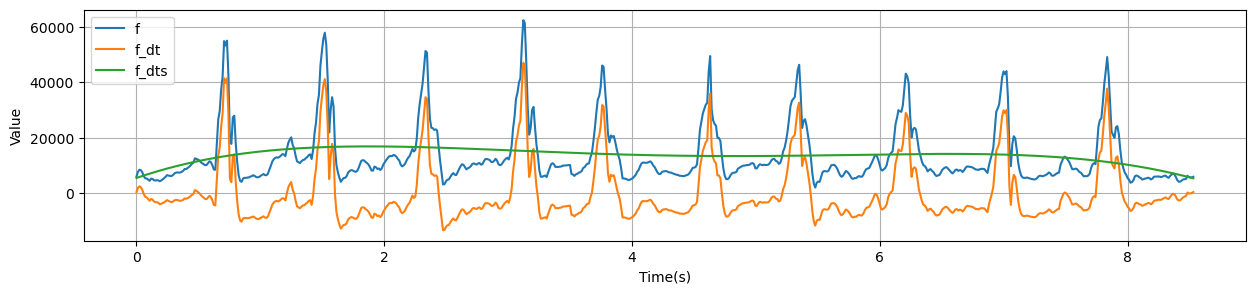

In [19]:
f_dt = tb_sg.Detrends(f, 5)
f_dts = f - f_dt
tb_dw.FigNew(l = 15)
tb_dw.FigAddSignal(f, labelName='f')
tb_dw.FigAddSignal(f_dt, labelName='f_dt')
tb_dw.FigAddSignal(f_dts, labelName='f_dts', showAfterAdd=True)

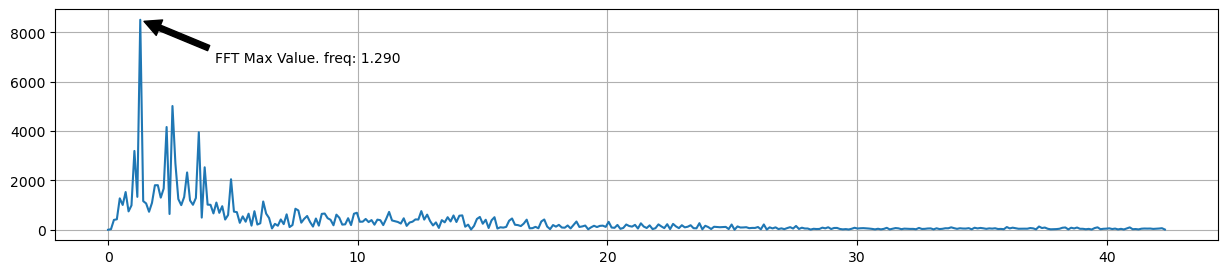

In [20]:
fftMax = tb_sg.GetFFTMaxValue(f_dt.squeeze(), showFFT =True)

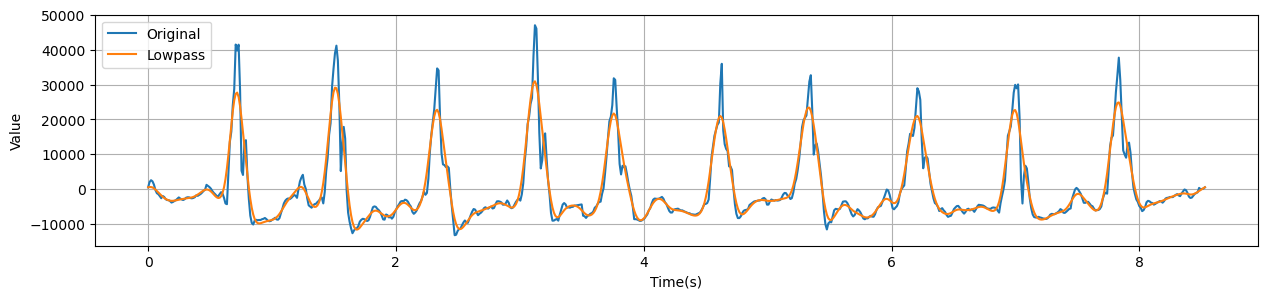

In [21]:
f_dt_low = tb_sg.LowpassFilter(f_dt, fftMax * 4, order = 2)
tb_dw.FigNew()
tb_dw.FigAddSignal(f_dt, labelName='Original')
tb_dw.FigAddSignal(f_dt_low, labelName='Lowpass', showAfterAdd=True)

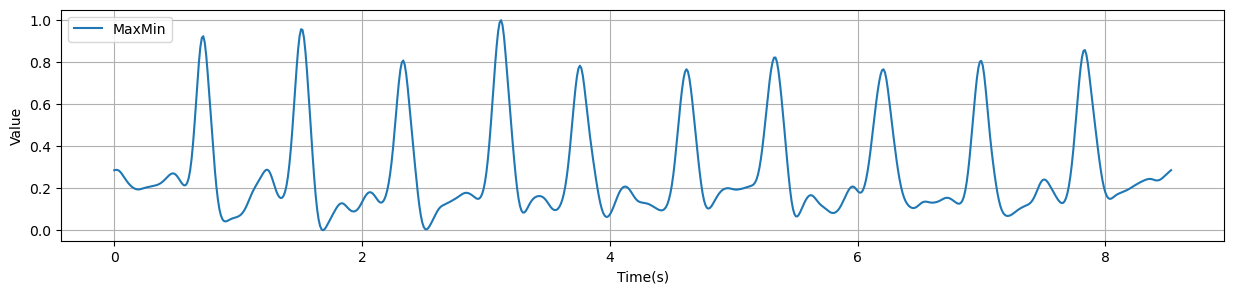

In [22]:
f_dt_low_maxmin = tb_sg.MaxMin(f_dt_low)
tb_dw.FigNew()
tb_dw.FigAddSignal(f_dt_low_maxmin,labelName='MaxMin',showAfterAdd=True)

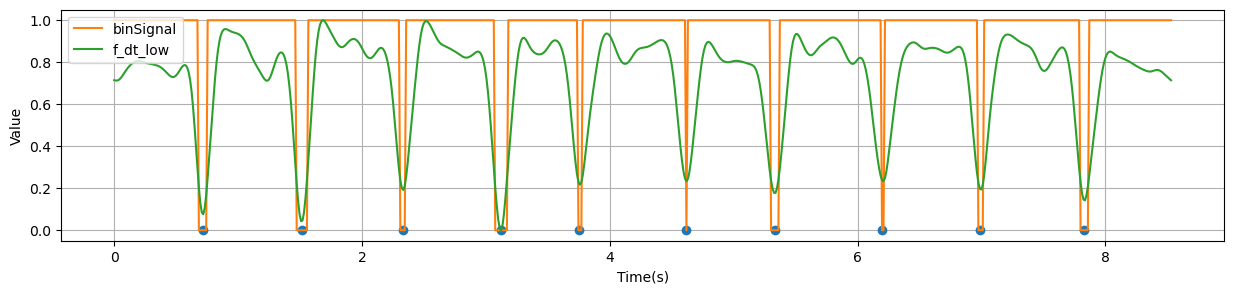

In [23]:
centerData = np.ones([len(f_dt_low_maxmin),1]) - f_dt_low_maxmin

ct1, v = tb_sg.RecursionFineBinSigalCerter(centerData, numOfWave ,100)
binSignal = tb_sg.CreatBinSigal(centerData, v)

tb_dw.FigNew()
plt.plot(ct1/85, np.zeros(numOfWave), "o")
tb_dw.FigAddSignal(binSignal, labelName='binSignal')
tb_dw.FigAddSignal(centerData, labelName='f_dt_low', showAfterAdd=True)

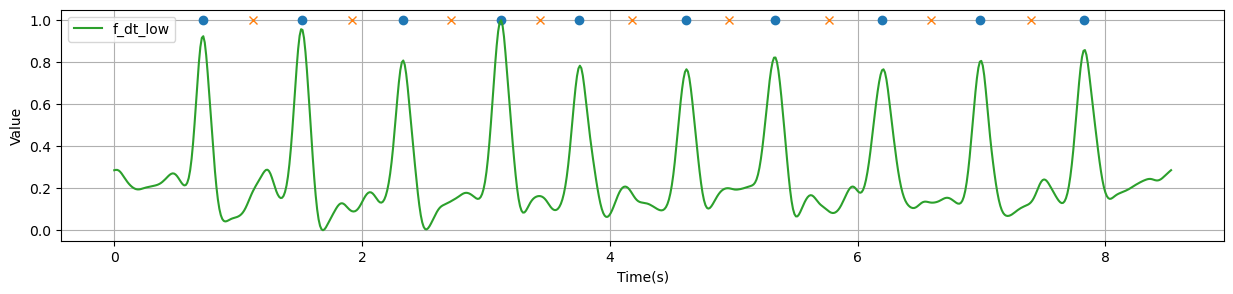

In [24]:
cutX = list()

for i in np.arange(0,len(ct1)-1, 1):
    cutX.append((ct1[i] + ct1[i+1]) //2)
cutX = np.array(cutX)

tb_dw.FigNew()
plt.plot(ct1/85, np.ones(numOfWave), "o")
plt.plot(cutX/85, np.ones(numOfWave-1), "x")
tb_dw.FigAddSignal(f_dt_low_maxmin, labelName='f_dt_low', showAfterAdd=True)

In [25]:
axis9Cut = list()

for i in np.arange(0, len(cutX)-1, 1):
    head = cutX[i].squeeze()
    tail = cutX[i+1].squeeze()
    cutArray = axis9[head: tail,:]
    axis9Cut.append(cutArray)

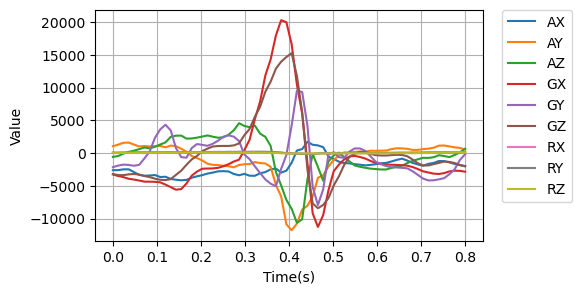

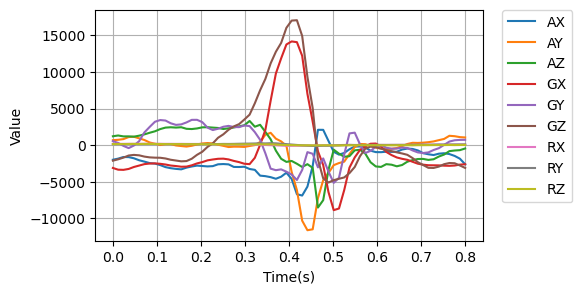

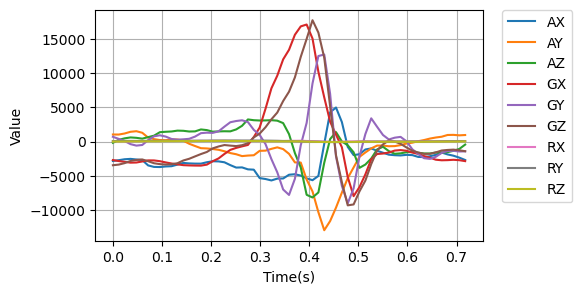

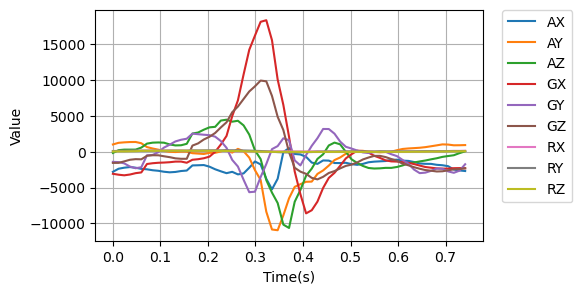

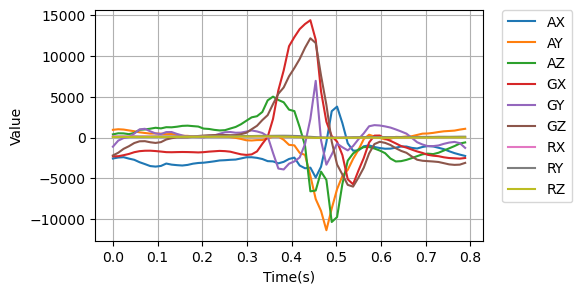

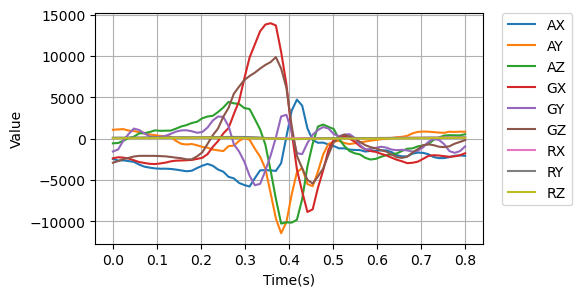

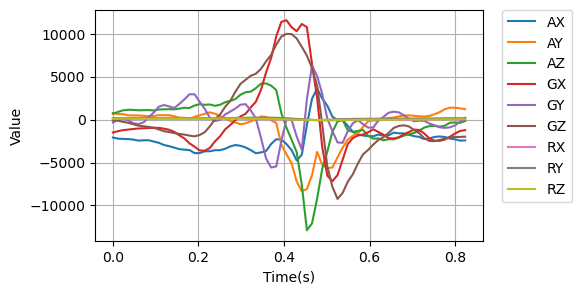

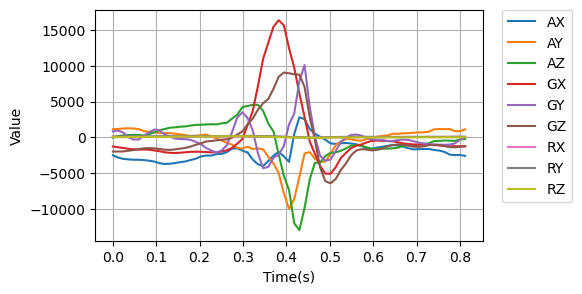

In [26]:
for i in axis9Cut:
    tb_dw.FigNew(l = 5)
    tb_dw.FigAddAxis(i, pf="ALL")
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

